## Importing and checking up the libraries

In [1]:
from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\25670\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\25670\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\25670\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Importing text from Exercise 1.4

In [2]:
# Import txt file

with open('key_events_20th_century.txt', 'r', errors='ignore') as file: 
   data = file.read().replace( '\n', ' ')

## Tokenize

In [3]:
# Sentence tokenization

from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(data)
print(tokenized_sent) 

['The 20th century changed the world in unprecedented ways.', 'The World Wars sparked tension between countries and led to the creation of atomic bombs , the Cold War led to the Space Race and the creation of space-based rockets, and the World Wide Web was created.', "These advancements have played a significant role in citizens' lives and shaped the 21st century into what it is today.", 'Historic events in the 20th century [ edit ] World at the beginning of the century [ edit ] Main article: Edwardian era The new beginning of the 20th century marked significant changes.', 'The 1900s saw the decade herald a series of inventions, including the automobile , airplane and radio broadcasting .', '1914 saw the completion of the Panama Canal .', 'From 1914 to 1918, the First World War, and its aftermath, caused major changes in the power balance of the world, destroying or transforming some of the most powerful empires.', '"The war to end all wars": World War I (1914â€“1918) [ edit ] Main art

In [4]:
# Word tokenization

from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word) 

['The', '20th', 'century', 'changed', 'the', 'world', 'in', 'unprecedented', 'ways', '.', 'The', 'World', 'Wars', 'sparked', 'tension', 'between', 'countries', 'and', 'led', 'to', 'the', 'creation', 'of', 'atomic', 'bombs', ',', 'the', 'Cold', 'War', 'led', 'to', 'the', 'Space', 'Race', 'and', 'the', 'creation', 'of', 'space-based', 'rockets', ',', 'and', 'the', 'World', 'Wide', 'Web', 'was', 'created', '.', 'These', 'advancements', 'have', 'played', 'a', 'significant', 'role', 'in', 'citizens', "'", 'lives', 'and', 'shaped', 'the', '21st', 'century', 'into', 'what', 'it', 'is', 'today', '.', 'Historic', 'events', 'in', 'the', '20th', 'century', '[', 'edit', ']', 'World', 'at', 'the', 'beginning', 'of', 'the', 'century', '[', 'edit', ']', 'Main', 'article', ':', 'Edwardian', 'era', 'The', 'new', 'beginning', 'of', 'the', '20th', 'century', 'marked', 'significant', 'changes', '.', 'The', '1900s', 'saw', 'the', 'decade', 'herald', 'a', 'series', 'of', 'inventions', ',', 'including', 'the

In [5]:
from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words) 

<FreqDist with 4668 samples and 21344 outcomes>


In [6]:
dist_words.most_common(10)

[(',', 2418),
 ('the', 1342),
 ('`', 1109),
 ("'", 1076),
 ('.', 920),
 ('and', 714),
 ('to', 647),
 ('a', 547),
 ('I', 487),
 ('it', 471)]

[(',', 2418),
 ('the', 1342),
 ('`', 1109),
 ("'", 1076),
 ('.', 920),
 ('and', 714),
 ('to', 647),
 ('a', 547),
 ('I', 487),
 ('it', 471)]

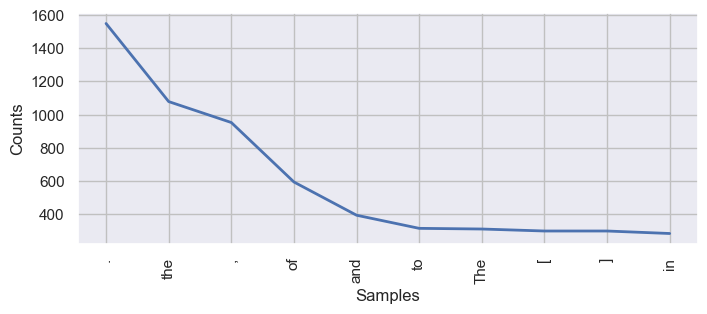

In [7]:
import matplotlib.pyplot as plt
from nltk import FreqDist

# Create a frequency distribution
dist_words = FreqDist(tokenized_word)

# Plot the frequency distribution (correct way)
plt.figure(figsize=(8, 3))  # Optional: Adjust the figure size
dist_words.plot(10, cumulative=False)  # Plot the top 10 most frequent words
plt.show()  # Show the plot


## Comment

From the graph, it can be seen that the most common are the punctuation marks with "full stop" being the highest in the count of above 1400 topping the list.  Essentially punctuation marks carry a particular informational value for the nature of the text in question helping the reader understand where the sentence begins and ends.
The most common word is "the" counting above 1000, this could have been used together with nouns or events. The rest of the words whose counting is below 800. Most common non-stop words are much lower in frequency than the most frequent stop words.

# Removing stopwords in words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\25670\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


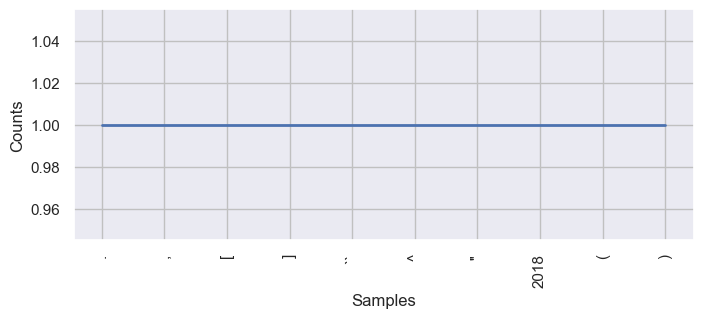

In [8]:
import matplotlib.pyplot as plt
from nltk import FreqDist
from nltk.corpus import stopwords
import nltk

# Ensure you have the stopwords data
nltk.download('stopwords')

# Load English stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords from words list
filtered_words = [dist_words for dist_words in dist_words if dist_words.lower() not in stop_words]

# Create a frequency distribution of filtered words
dist_words = FreqDist(filtered_words)

# Plot the frequency distribution
plt.figure(figsize=(8, 3))  # Optional: Adjust the figure size
dist_words.plot(10, cumulative=False)  # Plot the top 10 most frequent words
plt.show()  # Show the plot


## Comment

There are more punctuations in the above graph than the numbers. With the help of stopwords, we are able to have them removed from the graph or display so as to categorize other parts of speech. 
At the same time, both punctuations and numbers have a count of 1 even though the punctuations are more than the numbers.

In [9]:
# Substitute all punctuation marks with a space

sans_punc = re.sub("[^a-zA-Z]",  # Search for all non-letters
                        " ",        # Replace all non-letters with spaces
                        str(filtered_words))

In [10]:
# Word tokenization

tokenized_word_2 = word_tokenize(sans_punc)
print (tokenized_word_2)

['December', 'Retrieved', 'War', 'war', 'World', 's', 'Soviet', 'Hitler', 'Germany', 'History', 'ISBN', 'first', 'world', 'would', 'edit', 'Japan', 'Germans', 'German', 'New', 'II', 'Union', 'Japanese', 'century', 'United', 'ISSN', 'July', 'also', 'September', 'Europe', 'became', 'nuclear', 'States', 'August', 'June', 'Battle', 'attack', 'weapons', 'new', 'American', 'October', 'end', 'Stalin', 'Holocaust', 'Africa', 'Britain', 'May', 'April', 'North', 'Main', 'Allies', 'British', 'many', 'one', 'Nazi', 'two', 'forces', 'Allied', 'could', 'p', 'th', 'countries', 'However', 'Jews', 'later', 'U', 'S', 'Cold', 'France', 'February', 'led', 'November', 'history', 'invasion', 'Berlin', 'Internet', 'computer', 'January', 'BBC', 'Press', 'doi', 'York', 'article', 'South', 'nations', 'Italy', 'Army', 'battle', 'National', 'Space', 'First', 'power', 'Great', 'known', 'used', 'people', 'time', 'made', 'began', 'Poland', 'Second', 'Atlantic', 'Operation', 'Pacific', 'Vietnam', 'troops', 'governmen

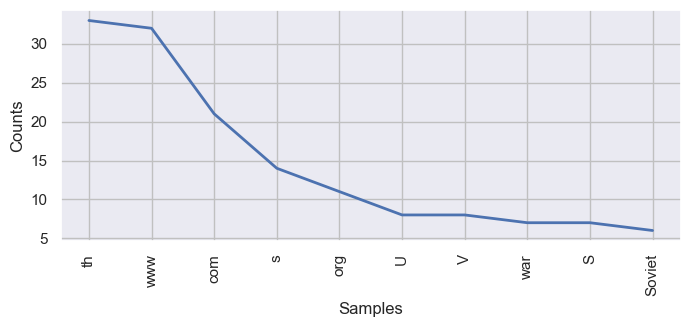

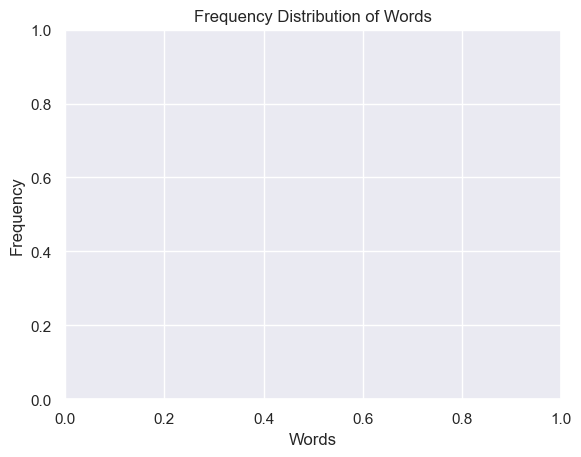

In [11]:
# Create a frequency distribution
dist_words_filter_2 = FreqDist(tokenized_word_2)

# Plot the frequency distribution
plt.figure(figsize=(8, 3))  # Optional: Adjust the figure size
dist_words_filter_2.plot(10, cumulative=False)  # Plot the top 10 most frequent words

# Customize the plot (optional)
plt.title('Frequency Distribution of Words')  # Add title to the plot
plt.xlabel('Words')  # x-axis label
plt.ylabel('Frequency')  # y-axis label

# Show the plot
plt.show()


## Comment

It appears that some letters remained behind after the first Tokenizing such as "th", "www", 's', 'U', 'V', 'S' with "th" having the highest frequency of about 38 and "S" being the lowest. It could have been due to the separation after removing the punctuations leaving such letters behind. 
The most frequent single letters are much higher in count than less frequent single letters or full nouns/verbs in the above graph.

In [12]:
new_stopwords = ["th", "www", 's', 'U', 'V', 'S']

filtered = []
for word in tokenized_word_2:
     if word not in new_stopwords:
        filtered.append(word)

## A tags list using TextBlob, a list of the Top 20 POS tags for words that appear in the article

In [13]:
%%time
text = TextBlob(str(filtered))

CPU times: total: 0 ns
Wall time: 3.99 ms


In [14]:
tags_list = text.tags
print(tags_list)

[('[', 'JJ'), ("'December", 'NNP'), ("'", 'POS'), ("'Retrieved", 'VBD'), ("'War", 'NNP'), ("'", 'POS'), ("'war", 'NNP'), ("'", 'POS'), ("'World", 'NNP'), ("'", 'POS'), ("'Soviet", 'NNP'), ("'", 'POS'), ("'Hitler", 'NNP'), ("'", 'POS'), ("'", 'POS'), ("'History", 'NNP'), ("'", 'POS'), ("'ISBN", 'NNP'), ("'", 'POS'), ("'first", 'NNP'), ("'", 'POS'), ("'world", 'NNP'), ("'", 'POS'), ("'would", 'MD'), ("'edit", 'NNP'), ("'", 'POS'), ("'", 'POS'), ("'Germans", 'NNS'), ("'", 'POS'), ("'German", 'NNP'), ("'", 'POS'), ("'New", 'NNP'), ("'", 'POS'), ("'II", 'NNP'), ("'", 'POS'), ("'Union", 'NN'), ("'Japanese", 'JJ'), ("'century", 'NNP'), ("'", 'POS'), ("'United", 'VBD'), ("'ISSN", 'NNP'), ("'", 'POS'), ("'July", 'NNP'), ("'", 'POS'), ("'also", 'NNP'), ("'", 'POS'), ("'September", 'NNP'), ("'", 'POS'), ("'nuclear", 'IN'), ("'States", 'VBZ'), ("'", 'POS'), ("'August", 'NNP'), ("'", 'POS'), ("'June", 'NNP'), ("'", 'POS'), ("'Battle", 'NNP'), ("'", 'POS'), ("'weapons", 'NNS'), ("'", 'POS'), ("'new"

## A list of the Top 20 POS tags for words that appear in the article, a bar chart using the seaborn library

In [15]:
df_text = pd.DataFrame(tags_list)
df_text.columns = [ 'Words', "Word type"]
df_t=df_text.groupby('Word type').count().reset_index()
top20=df_t.nlargest(20, 'Words')

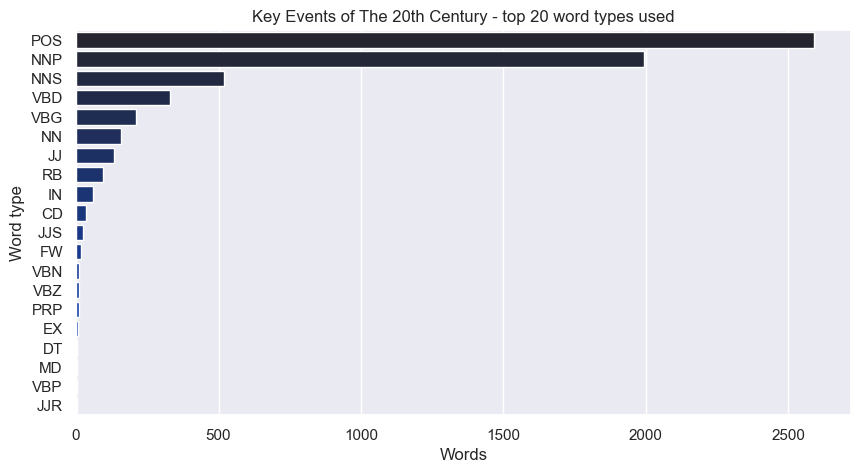

In [16]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 20):
      sns.barplot(x = "Words", y = "Word type",
     saturation = 0.9, data = top20).set_title("Key Events of The 20th Century - top 20 word types used")

# Show the plot (no indentation needed here)
plt.show()

## Comment

The most frequent parts of speech are nouns with a count of about 2000 (NNP-proper noun, NNS-noun) making nouns more dominant in the text compared to verbs and adjectives which have a count of less than 500. This could mean that the text is full of events.

In [17]:
df = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNS")]
df.columns = ["Word", "Occurrences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurrences'], ascending=False)
top10 = y.nlargest(10, 'Occurrences') 

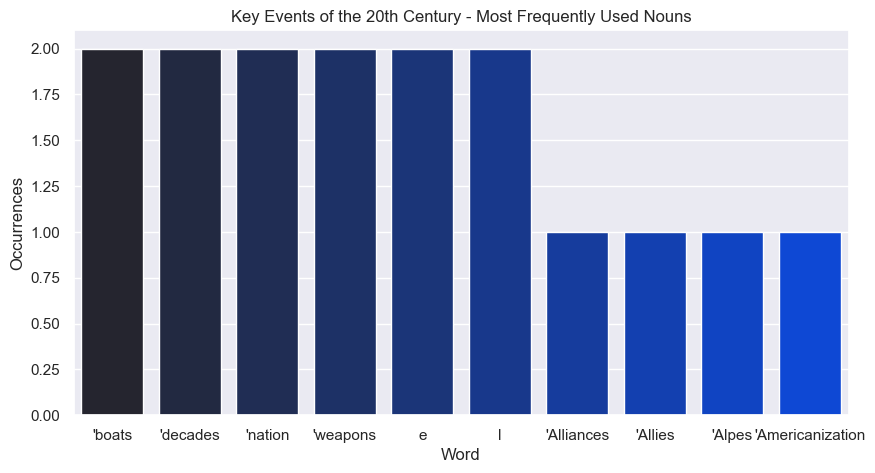

In [18]:
plt.figure(figsize=(10, 5))

sns.set_palette(sns.dark_palette("xkcd:blue", n_colors=10))
      
# Create the barplot
sns.barplot(x="Word", y="Occurrences", data=top10, saturation=0.9).set_title("Key Events of the 20th Century - Most Frequently Used Nouns")

# Show the plot
plt.show()

## Comment

From, the graph the most frequent nouns are boats, decades, nation, and weapons whose occupancies are 2.00 making them the highest. On the other hand, Alliances, Allies, Alpes, and Americanization have much lower occupancies of about 1.00 which is less than that of most frequent nouns.

In [19]:
listToStr = ' '.join([str(elem) for elem in filtered])

print(listToStr)

December Retrieved War war World Soviet Hitler Germany History ISBN first world would edit Japan Germans German New II Union Japanese century United ISSN July also September Europe became nuclear States August June Battle attack weapons new American October end Stalin Holocaust Africa Britain May April North Main Allies British many one Nazi two forces Allied could p countries However Jews later Cold France February led November history invasion Berlin Internet computer January BBC Press doi York article South nations Italy Army battle National Space First power Great known used people time made began Poland Second Atlantic Operation Pacific Vietnam troops government launched March major came Nations economic early East use French US Nuclear Richard space HISTORY University including Empire military Imperial days army several West island camps John International Archived original Guardian wars Russia Treaty independence next European Western crisis state Mussolini Pact air launch bomb 

In [20]:
# Create a count for the main characters

all_counts = Counter(re.sub(r'\W+', ' ', listToStr).split()) 

## Three bar plots with the top 15 POS labels—one each for nouns, verbs, and adjectives

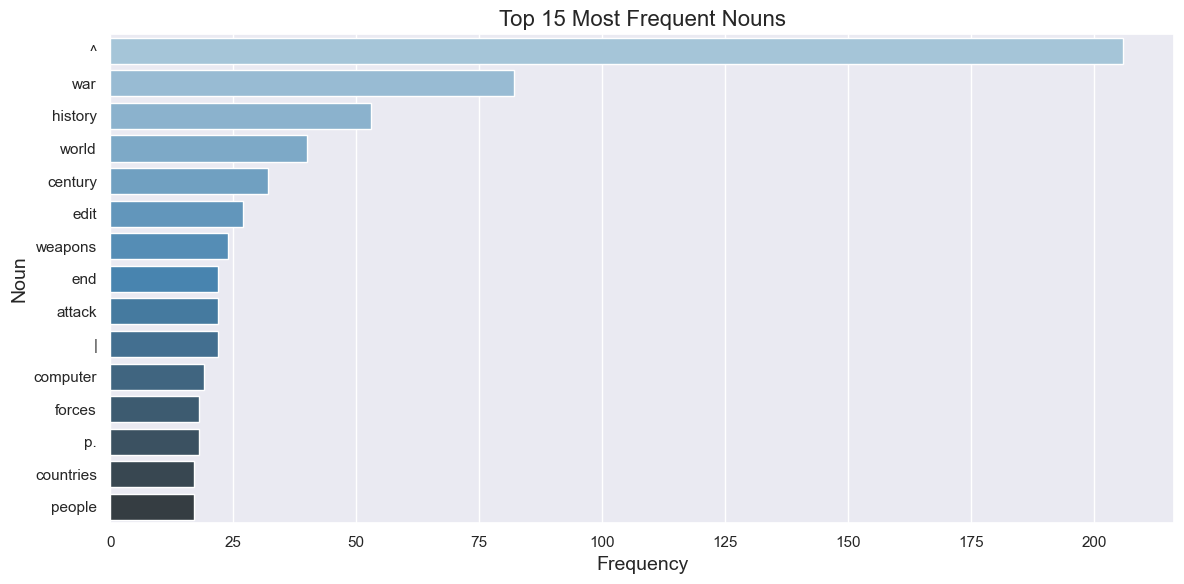

In [21]:
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Load spaCy's English model
nlp = spacy.load("en_core_web_sm")

# Read the text document (replace with your actual text or path to your file)
file_path = 'key_events_20th_century.txt'  # Replace this with the actual file path
with open(file_path, 'r', errors='ignore') as file:
    text = file.read()

# Process the text using spaCy
doc = nlp(text)

# Extract nouns (POS tag 'NOUN') from the processed text
nouns = [token.text.lower() for token in doc if token.pos_ == 'NOUN' and not token.is_stop]

# Count the frequency of each noun
noun_counts = Counter(nouns)

# Get the top 15 most common nouns
top_nouns = noun_counts.most_common(15)

# Prepare DataFrame for plotting
df_nouns = pd.DataFrame(top_nouns, columns=["Noun", "Frequency"])

# Create the bar plot for top 15 nouns
plt.figure(figsize=(12, 6))
sns.barplot(x="Frequency", y="Noun", data=df_nouns, palette="Blues_d")

# Add titles and labels
plt.title("Top 15 Most Frequent Nouns", fontsize=16)
plt.xlabel("Frequency", fontsize=14)
plt.ylabel("Noun", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


## Conclusion for Nouns

I see fair/average usage of nouns with the highest frequency of over 75 which suggests that the text may have a focus on specific people/personalities, places/countries, or events, likely found in histories such as the text in question.

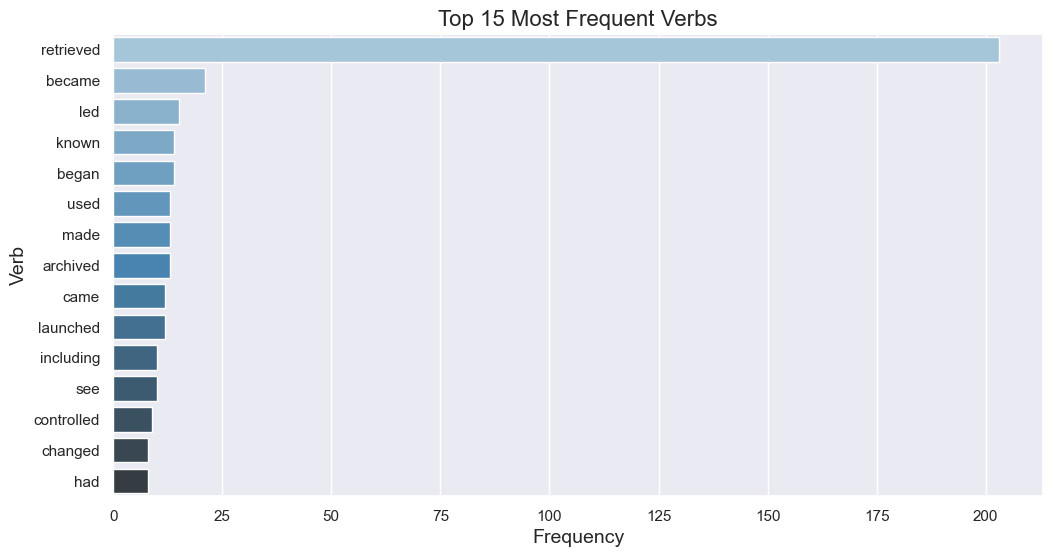

In [22]:
## Verbs
# Read the text document (replace with your actual text or path to your file)
file_path = 'key_events_20th_century.txt'  # Replace this with the actual file path
with open(file_path, 'r', errors='ignore') as file:
    text = file.read()

# Process the text using SpaCy
doc = nlp(text)

# Extract verbs
verbs = [token.text.lower() for token in doc if token.pos_ == "VERB"]

# Count the frequency of each verb
verb_freq = Counter(verbs)

# Get the top 15 most common verbs
top_15_verbs = verb_freq.most_common(15)

# Create a DataFrame for easy plotting
df_verbs = pd.DataFrame(top_15_verbs, columns=["Verb", "Frequency"])

# Plot the results using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x="Frequency", y="Verb", data=df_verbs, palette="Blues_d")

# Add titles and labels
plt.title("Top 15 Most Frequent Verbs", fontsize=16)
plt.xlabel("Frequency", fontsize=14)
plt.ylabel("Verb", fontsize=14)

# Show the plot
plt.show()


## Conclusion for verbs

Verbs are the most used with the highest frequency above 200, suggesting that the text is action-oriented. This is because verbs are doing words and thus spell some action or events in them, especially with the highest verb being "retrieved" making the text more action-oriented and dynamic. This is in comparison to other parts of speech such as nouns and adjectives.

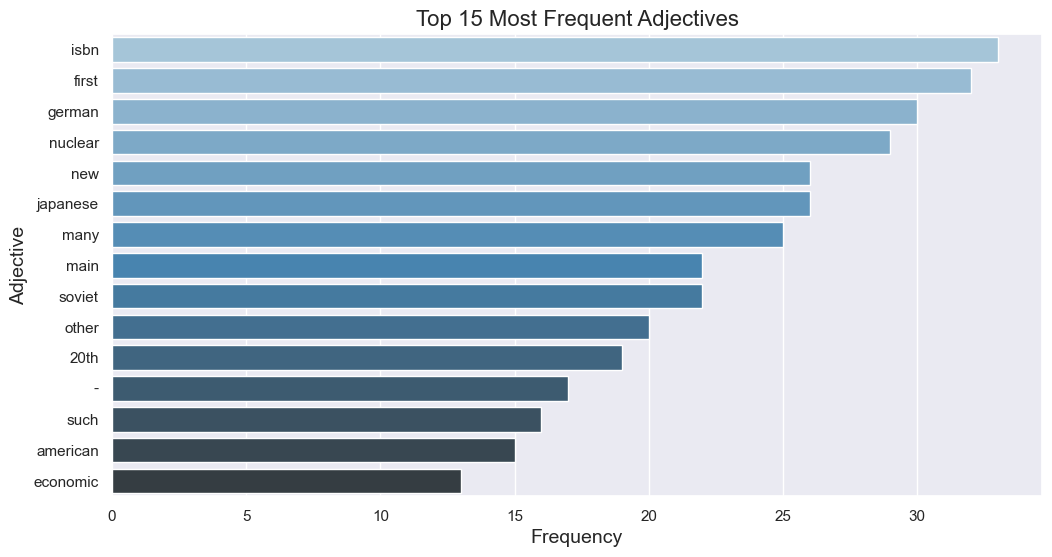

In [23]:
## adjectives

# Read the text from the file (replace 'path_to_file.txt' with your actual file path)
file_path = 'key_events_20th_century.txt'  # Replace with your file path
with open(file_path, 'r', errors='ignore') as file:
    text = file.read()

# Process the text using SpaCy
doc = nlp(text)

# Extract adjectives (POS tag 'ADJ')
adjectives = [token.text.lower() for token in doc if token.pos_ == "ADJ"]

# Count the frequency of each adjective
adjective_freq = Counter(adjectives)

# Get the top 15 most common adjectives
top_15_adjectives = adjective_freq.most_common(15)

# Create a DataFrame for easy plotting
df_adjectives = pd.DataFrame(top_15_adjectives, columns=["Adjective", "Frequency"])

# Plot the results using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x="Frequency", y="Adjective", data=df_adjectives, palette="Blues_d")

# Add titles and labels
plt.title("Top 15 Most Frequent Adjectives", fontsize=16)
plt.xlabel("Frequency", fontsize=14)
plt.ylabel("Adjective", fontsize=14)

# Show the plot
plt.show()

## Conclusion for Adjectives

The usage of Adjectives is less in the text. Incomparison to verbs, this is less with with the highest frequency of above 30 which signals a more straightforward, objective, or action-driven style of writing, where the focus is on conveying facts, processes, or ideas without additional descriptive language.

## Create a dataframe with the countries and the number of times they are mentioned in your text

In [24]:
# Import txt file and read the countries
with open('Countries_List.txt', 'r', errors='ignore') as file: 
    # Read all lines and strip any extra whitespace
    data = file.read().strip()

# Split the data into a list by newlines
countries_list = data.split('\n')

# Optionally, you can strip leading/trailing spaces from each country
countries_list = [country.strip() for country in countries_list]

# Print the resulting list
print(countries_list)


['country_name', '1\t Afghanistan', '2\t  Albania', '3\t  Algeria', '4\t  Andorra', '5\t  Angola', '6\t  Antigua and Barbuda', '7\t  Argentina', '8\t  Armenia', '9\t  Australia', '10\t  Austria', '11\t  Azerbaijan', '12\t" Bahamas, The "', '13\t  Bahrain', '14\t  Bangladesh', '15\t  Barbados', '16\t  Belarus', '17\t  Belgium', '18\t  Belize', '19\t  Benin', '20\t  Bhutan', '21\t  Bolivia', '22\t  Bosnia and Herzegovina', '23\t  Botswana', '24\t  Brazil', '25\t  Brunei', '26\t  Bulgaria', '27\t  Burkina Faso', '28\t  Burundi', '29\t Cambodia', '30\t  Cameroon', '31\t  Canada', '32\t  Cape Verde', '33\t  Central African Republic', '34\t  Chad', '35\t  Chile', '36\t"  China, People\'s Republic of "', '37\t  Colombia', '38\t  Comoros', '39\t"  Congo, Democratic Republic of the "', '40\t"  Congo, Republic of the "', '41\t  Costa Rica', '42\t  Croatia', '43\t  Cuba', '44\t  Cyprus', '45\t  Czech Republic', '46\t  Denmark', '47\t   Djibouti', '48\t   Dominica', '49\t   Dominican Republic', '5

In [25]:
# Your original data (list of country names with indices)
country_list_raw = [
    '1\t Afghanistan', '2\t  Albania', '3\t  Algeria', '4\t  Andorra', '5\t  Angola', 
    '6\t  Antigua and Barbuda', '7\t  Argentina', '8\t  Armenia', '9\t  Australia', 
    '10\t  Austria', '11\t  Azerbaijan', '12\t" Bahamas, The "', '13\t  Bahrain', 
    '14\t  Bangladesh', '15\t  Barbados', '16\t  Belarus', '17\t  Belgium', '18\t  Belize', 
    '19\t  Benin', '20\t  Bhutan', '21\t  Bolivia', '22\t  Bosnia and Herzegovina', 
    '23\t  Botswana', '24\t  Brazil', '25\t  Brunei', '26\t  Bulgaria', '27\t  Burkina Faso', 
    '28\t  Burundi', '29\t Cambodia', '30\t  Cameroon', '31\t  Canada', '32\t  Cape Verde', 
    '33\t  Central African Republic', '34\t  Chad', '35\t  Chile', '36\t"  China, People\'s Republic of "', 
    '37\t  Colombia', '38\t  Comoros', '39\t"  Congo, Democratic Republic of the "', 
    '40\t"  Congo, Republic of the "', '41\t  Costa Rica', '42\t  Croatia', '43\t  Cuba', 
    '44\t  Cyprus', '45\t  Czech Republic', '46\t  Denmark', '47\t   Djibouti', '48\t   Dominica', 
    '49\t   Dominican Republic', '50\t  East Timor', '51\t   Ecuador', '52\t   Egypt', 
    '53\t   El Salvador', '54\t   Equatorial Guinea', '55\t   Eritrea', '56\t   Estonia', 
    '57\t   Eswatini', '58\t   Ethiopia', '59\t  Fiji', '60\t   Finland', '61\t   France', 
    '62\t  Gabon', '63\t"   Gambia, The "', '64\t   Georgia', '65\t   Germany', '66\t   Ghana', 
    '67\t   Greece', '68\t   Grenada', '69\t   Guatemala', '70\t   Guinea', '71\t   Guinea', 
    '72\tBissau', '73\t   Guyana', '74\t  Haiti', '75\t   Honduras', '76\t   Hungary', 
    '77\t  Iceland', '78\t   India', '79\t   Indonesia', '80\t   Iran', '81\t   Iraq', '82\t   Ireland', 
    '83\t   Israel', '84\t   Italy', '85\t   Ivory Coast', '86\t  Jamaica', '87\t   Japan', 
    '88\t   Jordan', '89\t  Kazakhstan', '90\t   Kenya', '91\t   Kiribati', '92\t"   Korea, North "', 
    '93\t"   Korea, South "', '94\t   Kuwait', '95\t   Kyrgyzstan', '96\t  Laos', '97\t   Latvia', 
    '98\t   Lebanon', '99\t   Lesotho', '100\t   Liberia', '101\t   Libya', '102\t   Liechtenstein', 
    '103\t   Lithuania', '104\t   Luxembourg', '105\t  Madagascar', '106\t   Malawi', '107\t   Malaysia', 
    '108\t   Maldives', '109\t   Mali', '110\t   Malta', '111\t   Marshall Islands', '112\t   Mauritania', 
    '113\t   Mauritius', '114\t   Mexico', '115\t"   Micronesia, Federated States of "', 
    '116\t   Moldova', '117\t   Monaco', '118\t   Mongolia', '119\t   Montenegro', '120\t   Morocco', 
    '121\t   Mozambique', '122\t   Myanmar', '123\t  Namibia', '124\t   Nauru', '125\t     Nepal', 
    '126\t   Netherlands', '127\t   New Zealand', '128\t   Nicaragua', '129\t   Niger', '130\t   Nigeria', 
    '131\t   North Macedonia', '132\t   Norway', '133\t  Oman', '134\t  Pakistan', '135\t   Palau', 
    '136\t   Palestine', '137\t   Panama', '138\t   Papua New Guinea', '139\t   Paraguay', 
    '140\t   Peru', '141\t   Philippines', '142\t   Poland', '143\t   Portugal', '144\t  Qatar', 
    '145\t  Romania', '146\t   Russia', '147\t   Rwanda', '148\t  Saint Kitts and Nevis', 
    '149\t   Saint Lucia', '150\t   Saint Vincent and the Grenadines', '151\t   Samoa', '152\t   San Marino', 
    '153\t   São Tomé and Príncipe', '154\t   Saudi Arabia', '155\t   Senegal', '156\t   Serbia', 
    '157\t   Seychelles', '158\t   Sierra Leone', '159\t   Singapore', '160\t   Slovakia', 
    '161\t   Slovenia', '162\t   Solomon Islands', '163\t   Somalia', '164\t   South Africa', 
    '165\t   South Sudan', '166\t   Spain', '167\t   Sri Lanka', '168\t   Sudan', '169\t   Suriname', 
    '170\t   Sweden', '171\t    Switzerland', '172\t   Syria', '173\t  Tajikistan', '174\t   Tanzania', 
    '175\t   Thailand', '176\t   Togo', '177\t   Tonga', '178\t   Trinidad and Tobago', '179\t   Tunisia', 
    '180\t   Turkey', '181\t   Turkmenistan', '182\t   Tuvalu', '183\t  Uganda', '184\t   Ukraine', 
    '185\t   United Arab Emirates', '186\t   United Kingdom', '187\t   United States', '188\t   Uruguay', 
    '189\t   Uzbekistan', '190\t  Vanuatu', '191\t    Vatican City (Holy See)', '192\t   Venezuela', 
    '193\t   Vietnam', '194\t  Yemen', '195\t  Zambia', '196\t   Zimbabwe', '197\t  Abkhazia', 
    '198\t   Artsakh', '199\t   Cook Islands', "200\t   Donetsk People's Republic", '201\t   Kosovo', 
    "202\t   Luhansk People's Republic", '203\t   Niue', '204\t   Northern Cyprus', 
    '205\t   Sahrawi Arab Democratic Republic', '206\t   Somaliland', '207\t   South Ossetia', 
    '208\t   Taiwan', '209\t   Transnistria'
]

# Clean the data: Separate the number and country name
country_dict = {}
for entry in country_list_raw:
    parts = entry.split('\t')
    number = parts[0].strip()  # Country number (e.g., '1')
    country_name = parts[1].strip().replace('"', '').replace('“', '').replace('”', '')  # Remove extra quotes and spaces
    country_dict[number] = country_name

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(list(country_dict.items()), columns=["Index", "Country"])

# Display the entire DataFrame (list of 208 countries)
pd.set_option('display.max_rows', 208)  # Ensure that all rows are displayed
print(df)

    Index                           Country
0       1                       Afghanistan
1       2                           Albania
2       3                           Algeria
3       4                           Andorra
4       5                            Angola
..    ...                               ...
204   205  Sahrawi Arab Democratic Republic
205   206                        Somaliland
206   207                     South Ossetia
207   208                            Taiwan
208   209                      Transnistria

[209 rows x 2 columns]


In [26]:
# Create a DataFrame with 'COUNTRIES' column
chars = pd.DataFrame(countries_list, columns=["Country"])

# Remove numbers and tabs from country names using regular expression
chars['Country'] = chars['Country'].apply(lambda x: re.sub(r'^\d+\t|\t', '', x).strip())


# Apply the operation to create a new column 'COUNTRIES_alias'
# If the country has a space, keep it as is (2 words). Otherwise, just return the name.
chars['Country_ALIAS'] = chars['Country'].apply(lambda x: x if ' ' not in x else x)

# Display the DataFrame
print(chars)

                              Country                     Country_ALIAS
0                        country_name                      country_name
1                         Afghanistan                       Afghanistan
2                             Albania                           Albania
3                             Algeria                           Algeria
4                             Andorra                           Andorra
..                                ...                               ...
205  Sahrawi Arab Democratic Republic  Sahrawi Arab Democratic Republic
206                        Somaliland                        Somaliland
207                     South Ossetia                     South Ossetia
208                            Taiwan                            Taiwan
209                      Transnistria                      Transnistria

[210 rows x 2 columns]


In [27]:
chars_list = chars['Country_ALIAS'].to_list()

In [28]:
dict_of_counts = {d : all_counts[d] for d in chars_list}

In [29]:
df = pd.DataFrame(list(dict_of_counts.items()), columns=['Country', 'Count'])
df['In_List'] = df['Country'].isin(countries_list)
print(df)


                              Country  Count  In_List
0                        country_name      0     True
1                         Afghanistan      1    False
2                             Albania      1    False
3                             Algeria      1    False
4                             Andorra      0    False
..                                ...    ...      ...
204  Sahrawi Arab Democratic Republic      0    False
205                        Somaliland      0    False
206                     South Ossetia      0    False
207                            Taiwan      0    False
208                      Transnistria      0    False

[209 rows x 3 columns]


In [30]:
import pandas as pd
from collections import Counter
import re
import pycountry

# Read the content of the text document
with open("key_events_20th_century.txt", "r", encoding="utf-8") as file:
    text = file.read()

# Preprocess the text (lowercase it to ensure case-insensitive matching)
text = text.lower()

# List of country names (replace with your actual country list)
countries_list = [country.name.lower() for country in pycountry.countries]

# Initialize a Counter to store country counts
country_counts = Counter()

# Loop through each country name and count its occurrences in the text
for country in countries_list:
    # Use re.findall to get all occurrences of the country name in the text
    count = len(re.findall(r'\b' + re.escape(country.lower()) + r'\b', text))
    if count > 0:  # Only add countries that appear at least once
        country_counts[country] = count

# Create a DataFrame from the country counts
df = pd.DataFrame(country_counts.items(), columns=["Country", "Mentions"])

# Sort the DataFrame by the number of mentions (descending order)
df = df.sort_values(by="Mentions", ascending=False)

# Display the DataFrame
print(df)


             Country  Mentions
13           germany        42
33             japan        33
59     united states        23
20            france        16
32             italy        14
51            poland        13
10             china        10
29             india         9
49       philippines         5
37             libya         5
46            norway         5
4            austria         5
19           finland         4
23            guinea         4
25            greece         4
47          pakistan         4
31            israel         4
38         lithuania         3
52           romania         3
26              guam         3
28           hungary         3
14           denmark         3
12              cuba         3
16             egypt         2
18           estonia         2
21    united kingdom         2
27         hong kong         2
3          australia         2
2            albania         2
58           ukraine         2
54   solomon islands         2
5       

## Create a plot showing the frequency of the number of times these countries are mentioned in the text

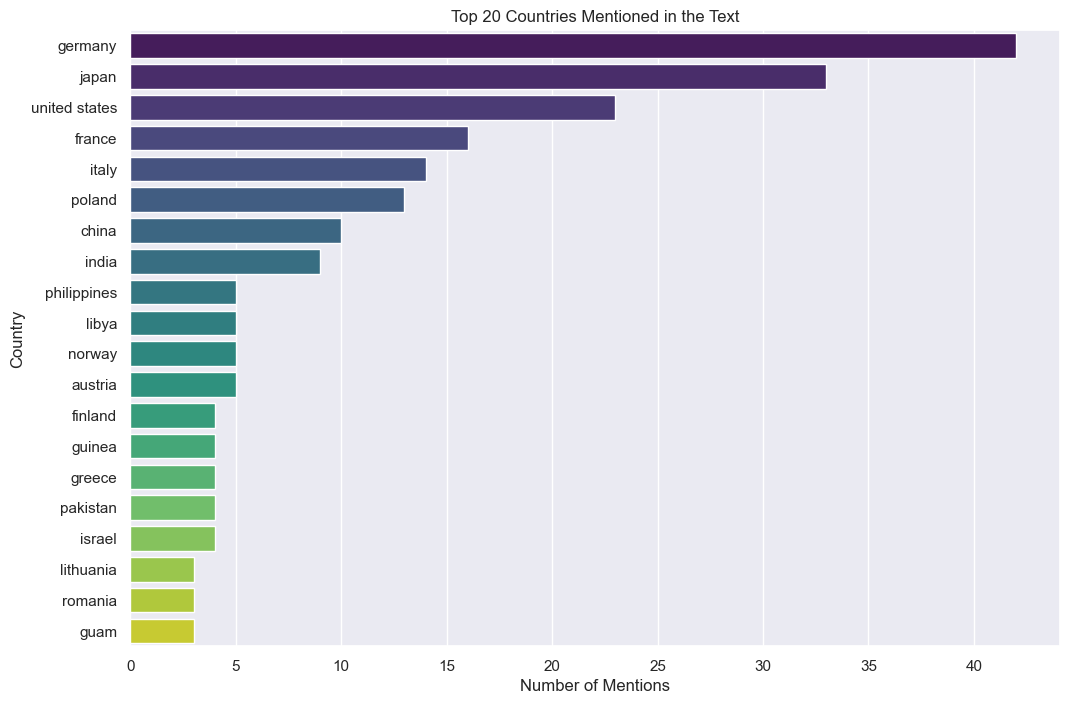

In [31]:
# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(x="Mentions", y="Country", data=df.head(20), palette="viridis")
plt.title("Top 20 Countries Mentioned in the Text")
plt.xlabel("Number of Mentions")
plt.ylabel("Country")
plt.show()


## My notes on the plot

I notice that many countries from the Americas (e.g., USA, Canada, Mexico, Brazil, Argentina) are mentioned frequently. This may reflect the text's focus on the Americas, potentially discussing regional events or issues.
European countries such as the United Kingdom, Germany, and France also appear in the top mentions, which is typical for texts discussing history.